# The dataset contains a list of video games with sales greater than 100,000 copies from 1980 to 2020 in different countries
 .Rank -Rank of  sales

 .Name -Name of game

 .Platform -Platform of the games release 

 .Year -Year of the game's release

 .Genre -Genre

 .Publisher -Publisher of the game

 .NA_Sales - Sales in North America 

 .EU_Sales - Sales in Europe 

 .JP_Sales - Sales in Japan 

 .Other_Sales -Sales in the rest of the world

 .Global_Sales -Globally sales

## Loading dataset

In [ ]:
import pandas as pd
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('darkgrid')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/vedio_games/archive-2.zip')


# checking Data

In [ ]:
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [ ]:
df.tail()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.0,0.0,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.0,0.0,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.0,0.0,0.01
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.0,0.0,0.01
16597,16600,Spirits & Spells,GBA,2003.0,Platform,Wanadoo,0.01,0.00,0.0,0.0,0.01


In [ ]:
#summary of data
df.describe()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16598.000000,16327.000000,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000
mean,8300.605254,2006.406443,0.264667,0.146652,0.077782,0.048063,0.537441
std,4791.853933,5.828981,0.816683,0.505351,0.309291,0.188588,1.555028
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4151.250000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8300.500000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12449.750000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.470000
max,16600.000000,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


In [ ]:
#shape of dataset
df.shape

(16598, 11)

In [ ]:
# data type of each column in the DataFrame
df.dtypes

Rank              int64
Name             object
Platform         object
Year            float64
Genre            object
Publisher        object
NA_Sales        float64
EU_Sales        float64
JP_Sales        float64
Other_Sales     float64
Global_Sales    float64
dtype: object

In [ ]:
# nmbr of missing/null values in each column
df.isnull().sum()

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

In [ ]:
df.dropna(subset = ['Year' ,'Publisher'], inplace=True)

# number of games sold over period of the year

In [ ]:
#nomber of games sold over period of the year
df[['Name','Year']].value_counts()

Name                          Year  
LEGO Marvel Super Heroes      2013.0    9
Ratatouille                   2007.0    9
FIFA 14                       2013.0    9
Madden NFL 07                 2006.0    8
Angry Birds Star Wars         2013.0    8
                                       ..
Hotel Dusk: Room 215          2007.0    1
Hotel Giant 2                 2008.0    1
Hotel Giant DS                2008.0    1
Hotel for Dogs                2008.0    1
¡Shin Chan Flipa en colores!  2007.0    1
Length: 12130, dtype: int64

In [ ]:
#checking for outliers
outliers = df[['Name', 'Year']].sort_values(by='Year')
outliers

,Name,Year
258,Asteroids,1980.0
6317,Bridge,1980.0
1969,Defender,1980.0
5366,Freeway,1980.0
1766,Kaboom!,1980.0
...,...,...
5288,Star Fox: Zero,2016.0
14390,Phantasy Star Online 2 Episode 4: Deluxe Package,2017.0
16438,Brothers Conflict: Precious Baby,2017.0
16241,Phantasy Star Online 2 Episode 4: Deluxe Package,2017.0


In [ ]:
#drop outliers
df.drop(df[df.Year> 2018].index, inplace=True)

#         Global sales of games

In [ ]:
#3 global no of games sold yearly
sales_year=df.groupby('Year')['Global_Sales'].sum()
sales_year

Year
1980.0     11.38
1981.0     35.77
1982.0     28.86
1983.0     16.79
1984.0     50.36
1985.0     53.94
1986.0     37.07
1987.0     21.74
1988.0     47.22
1989.0     73.45
1990.0     49.39
1991.0     32.23
1992.0     76.16
1993.0     45.98
1994.0     79.17
1995.0     88.11
1996.0    199.15
1997.0    200.98
1998.0    256.47
1999.0    251.27
2000.0    201.56
2001.0    331.47
2002.0    395.52
2003.0    357.85
2004.0    419.31
2005.0    459.94
2006.0    521.04
2007.0    611.13
2008.0    678.90
2009.0    667.30
2010.0    600.45
2011.0    515.99
2012.0    363.54
2013.0    368.11
2014.0    337.05
2015.0    264.44
2016.0     70.93
2017.0      0.05
2020.0      0.29
Name: Global_Sales, dtype: float64

Text(0, 0.5, 'Sales')

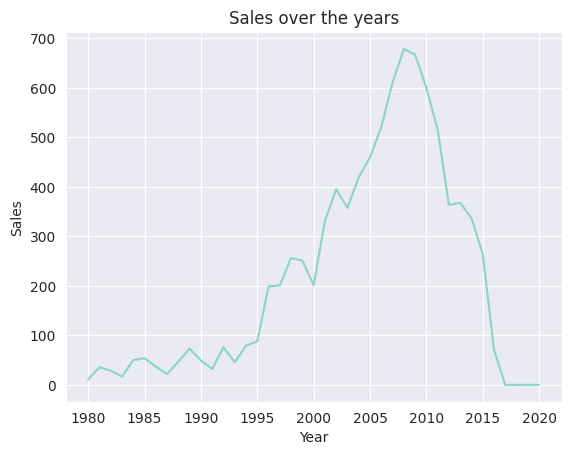

In [ ]:
sns.lineplot(y=sales_year,x=sales_year.index)
plt.title("Sales over the years")
plt.ylabel("Sales")

From **2005-2010** there hwas high picks of sales then the sales droped gradually

# Platforms with most games sold

In [ ]:
#4platforms with the most games sold?
platfrm=df.groupby(['Platform'])['Global_Sales'].sum().sort_values(ascending=False).head(10)
platfrm

Platform
PS2     1255.64
X360     979.96
PS3      957.84
Wii      926.71
DS       822.49
PS       730.66
GBA      318.50
PSP      296.28
PS4      278.10
PC       258.82
Name: Global_Sales, dtype: float64

Text(0.5, 1.0, 'Platforms')

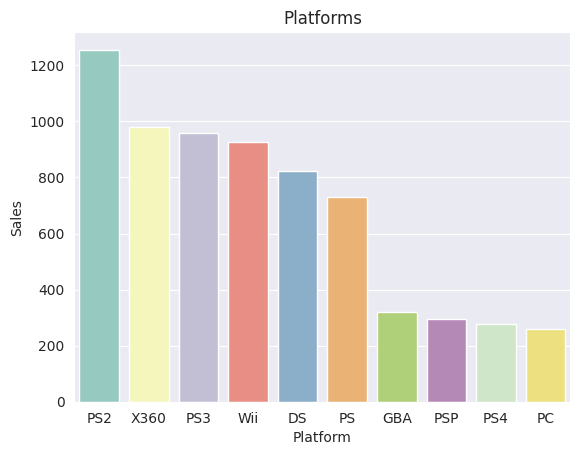

In [ ]:
#bar chart display of platforms have the most games sold?
plt.figure()
sns.barplot(x=platfrm.index,y=platfrm)
plt.ylabel("Sales")
plt.title("Platforms")

 the above plot we shows **PS2** platform have the heighest number of 
sales with over **1200** while the least platform is **PC** with sales below **300** 

#Genre in terms of sales

In [ ]:
#popular genre in term of sales
genre=df.groupby(["Genre"])["Global_Sales"].sum().sort_values(ascending=False)
genre

Genre
Action          1751.18
Sports          1330.93
Shooter         1037.37
Role-Playing     927.37
Platform         831.37
Misc             809.96
Racing           732.04
Fighting         448.91
Simulation       392.20
Puzzle           244.95
Adventure        239.04
Strategy         175.12
Name: Global_Sales, dtype: float64

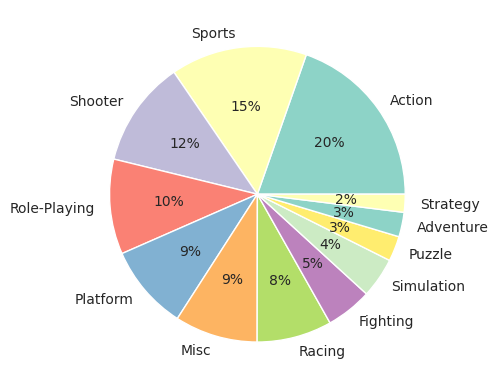

<Figure size 640x480 with 0 Axes>

In [ ]:
#pie chart display of poular genre sales
data=genre
labels=[]
for x in genre.index:
    labels.append(x)
plt.pie(data,labels=labels, autopct='%.0f%%')
plt.figure()
plt.show()

**Action** is the leading gaming genre with a **20%** sales globally followed by **Sports** with **15%**

You can see **Strategy** have the least sales of **2%** globaly

## **Conclusion**

From the analysis you can tell that most gamers love action and sports genre worldwide that led to increase of gamers and hieghest sales ever btw 2008-2009.

Action is highest saling game genre worlwide with 20% and the least ganre is Strategy with 2%.
PS2 is the most used platform globally.